# Day 22

In [4]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# MLE(Maximum Likelihood Estimation)의 원리

* Likelihood와 확률밀도함수의 차이
* Likelihood와 로그 Likelihood

MLE(Maximum Likelihood Estimation) 방법은 확률 모형의 모수 추정에서 가장 일반적으로 사용되는 방법이다. 

## Likelihood

확률 변수 $X$에 대한 확률 모형은 확률 밀도 함수 $f_X$에 의해 정의된다. 확률 밀도 함수는 일반적으로 $f_X(x;\theta)$와 같이 표기한다. 여기에서 $x$는 확률 변수가 가질 수 있는 실수값이고 $\theta$는 확률 밀도 함수 즉, 확률 모형의 모수(parameter) 집합을 대표하는 기호이다.

예를 들어 가우시안 확률 변수 $X$의 확률 밀도 함수는 다음과 같은 형태를 가진다. 이 식에서 $\theta = (\mu, \sigma^2)$ 이다.

$$ f_X (x; \theta) = f_X (x; \mu, \sigma^2) = \dfrac{1}{\sqrt{2\pi\sigma^2}} \exp\left({-\frac{(x-\mu)^2}{2\sigma^2}}\right) $$

함수의 관점에서 일반적으로 $\theta$는 고정된 값, 즉 상수 계수이고 $x$를 변수(variable)로 가정한다. 즉, 이미 확률 변수 모형은 고정되어 있고 주어진 실수 입력값에 대해 그 실수값이 나올 상대적 가능성을 출력하는 것이 $x$를 변수로 가지는 확률 밀도 함수이다.

그러나 반대로 추정 문제에서는 $x$ 즉, 이미 실현된 샘플값은 알고 있지만 모수 $\theta$를 모르고 있다. 이 경우에는 확률 밀도 함수라는 수식에서 $x$를 이미 결정되어 버린 상수 계수로 놓고 $\theta$를 찾아내야 할 변수로 생각할 수 있다. 물론 $f_X(x, \theta)$의 의미 자체는 변함없이 주어진 $x$가 나올 수 있는 확률밀도 값이다. 이를 likelihood라고 한다.

likelihood를 수식으로 나타내면 수식 자체는 확률밀도함수와 다르지 않다. 모수를 상수가 아닌 확률변수로 보는 경우에는 조건부 확률밀도함수로 쓸 수도 있다.

$$ \mathcal{L}(\theta;x) = f_X(x ; \theta)  = f_X(x \vert \theta) $$

* likelihood
    * 확률 밀도 함수를 랜덤변수의 값 $x$의 함수가 아닌 파라미터 $\theta$의 함수로 보는 것
    * 확률 분포로부터 특정한 샘플 값 $x$가 발생하였을 때, 이 샘플 값  $x$가 나오게 하는 파라미터 $\theta$의 가능성
    * 확률 분포로부터 특정한 샘플 값 $x$가 발생하였을 때, 샘플 값  $x$와 변수 $\theta$에서의는 확률(밀도함수)


* 확률 밀도 함수 $f_X(x; \theta) $
    * $\theta$ 값을 이미 알고 있음
    * $\theta$는 상수, $x$는 변수
    * $\theta$가 이미 정해져 있는 상황에서의 $x$ 값의 상대적 가능성


* Likelihood $L(\theta) = f_X(x|\theta)$
    * $x$가 이미 발생. 값을 이미 알고 있음
    * $x$는 상수, $\theta$는 변수
    * $x$가 이미 정해져 있는 상황에서의 $\theta$ 값의 상대적 가능성



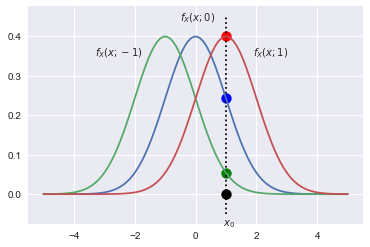

In [6]:
x = np.linspace(-5, 5, 100)
plt.plot(x, sp.stats.norm(loc=0).pdf(x))
plt.scatter(1, 0, s=100, c='k')
plt.vlines(1, -0.05, 0.45, linestyle=":")
plt.text(1-0.09, -0.08, "$x_0$")
plt.plot(x, sp.stats.norm(loc=-1).pdf(x))
plt.plot(x, sp.stats.norm(loc=1).pdf(x))
plt.scatter(1, sp.stats.norm(loc=-1).pdf(1), s=100, c='g');
plt.scatter(1, sp.stats.norm(loc=0).pdf(1), s=100, c='b');
plt.scatter(1, sp.stats.norm(loc=1).pdf(1), s=100, c='r');
plt.text(-3.3, 0.35, "$f_X(x;-1)$")
plt.text(-0.5, 0.44, "$f_X(x;0)$")
plt.text(1.9, 0.35, "$f_X(x;1)$");

일반적으로는 추정을 위해 확보하고 있는 확률변수 표본의 수가 하나가 아니라 복수개($x_1, x_2, \cdots x_N$)이므로 likelihood도 복수 샘플값에 대한 결합확률밀도 $f_{X_1, X_2, \cdots, X_N}(x_1, x_2, \cdots, x_N ; \theta)$ 에서 구해야 한다.

## MLE의 구현

실제로 MLE 방법을 사용하려면 likelihood가 최대가 되는 $\theta$를 수치적으로 계산해야 한다. 즉 수치적 최적화(numerical optimization) 문제가 된다.

$$ \hat\theta_{\text{MLE}} = \arg \max_{\theta} L(\theta; \{x_i\}) $$

일반적으로 likelihood를 직접 사용하는 것이 아니라 다음과 같은 이유로 로그 변환한 로그 likelihood 함수 $\mathcal{LL} = \log{\mathcal{L}}$를 사용하는 경우가 많다.


1. 로그 변환에 의해서는 최대값의 위치가 변치 않는데다
1. 반복시행으로 인한 복수 표본 데이터인 경우 결합 확률밀도함수가 동일한 함수의 곱으로 나타나는 경우가 많은데 이 때 로그 변환에 의해 곱셈이 덧셈되어 계산이 단순해진다.

# MLE 방법의 적용 예

## 베르누이 분포의 모수 추정



* 각각의 시도 $x_i$에 대한 확률은 베르누이 분포

$$ P(x ; \theta ) = \text{Bern}(x ; \theta ) = \theta^x (1 - \theta)^{1-x}$$


*  $N$개의 독립 샘플 $x_{1:N}$ 이 있는 경우, 
$$ L(\theta ; x_{1:N}) = P(x_{1:N};\theta) = \prod_{i=1}^N  \theta^{x_i} (1 - \theta)^{1-x_i} $$

* Log-Likelihood
$$ 
\begin{eqnarray*}
\log L 
&=& \log P(x_{1:N};\theta)  \\
&=& \sum_{i=1}^N \big\{ {x_i} \log\theta + (1-x_i)\log(1 - \theta) \big\} \\
&=&  \sum_{i=1}^N {x_i} \log\theta +  \left( N-\sum_{i=1}^N x_i \right) \log( 1 - \theta ) \\
\end{eqnarray*}
$$


* $x = 1$(성공) 또는 $x= 0$ (실패) 이므로 
 * 전체 시도 횟수 $N$
 * 그 중 성공 횟수 $N_1 = \sum_{i=1}^N {x_i}$
 
 
* 따라서  Log-Likelihood는 
$$ 
\begin{eqnarray*}
\log L 
&=&  N_1 \log\theta  + (N-N_1) \log(1 - \theta) \\
\end{eqnarray*}
$$

* Log-Likelihood Derivative

$$
\begin{eqnarray*}
\dfrac{\partial \log L}{\partial \theta} 
&=& \dfrac{\partial}{\partial \theta} \big\{ N_1 \log\theta  + (N-N_1) \log(1 - \theta)  \big\} = 0\\
&=& \dfrac{N_1}{\theta}  - \dfrac{N-N_1}{1-\theta} = 0 \\
\end{eqnarray*}
$$


$$
\dfrac{N_1}{\theta}  = \dfrac{N-N_1}{1-\theta}
$$


$$
\dfrac{1-\theta}{\theta} = \dfrac{N-N_1}{N_1} 
$$


$$
\dfrac{1}{\theta} - 1 = \dfrac{N}{N_1} - 1
$$


$$
\theta= \dfrac{N_1}{N}
$$

In [7]:
np.random.seed(0)
theta0 = 0.6
x = sp.stats.bernoulli(theta0).rvs(1000)
N0, N1 = np.bincount(x, minlength=2)
N = N0 + N1
theta = N1/N
theta

0.60999999999999999

## 카테고리 분포의 모수 추정


* 각각의 시도 $x_i$에 대한 확률은 카테고리 분포

$$ P(x ; \theta ) = \text{Cat}(x ; \theta) = \prod_{k=1}^K \theta_k^{x_k} $$

$$ \sum_{k=1}^K \theta_k = 1 $$


*  $N$개의 독립 샘플 $x_{1:N}$ 이 있는 경우, 
$$ L(\theta ; x_{1:N}) = P(x_{1:N};\theta) = \prod_{i=1}^N \prod_{k=1}^K \theta_k^{x_{i,k}} $$

* Log-Likelihood
$$ 
\begin{eqnarray*}
\log L 
&=& \log P(x_{1:N};\theta)  \\
&=& \sum_{i=1}^N \sum_{k=1}^K  \left( {x_{i,k}} \log\theta_k  \right) \\
&=& \sum_{k=1}^K  \sum_{i=1}^N  \left(  \log\theta_k  {x_{i,k}}\right) \\
&=& \sum_{k=1}^K \left( \log\theta_k \left( \sum_{i=1}^N {x_{i,k}}   \right)  \right)
\end{eqnarray*}
$$


* $x_k$가 나온 횟수 $N_k = \sum_{i=1}^N {x_{i,k}}$이라고 표시

 
* 따라서  Log-Likelihood는 
$$ 
\begin{eqnarray*}
\log L 
&=& \sum_{k=1}^K \left( \log\theta_k  N_k  \right)
\end{eqnarray*}
$$

* 추가 조건
$$ \sum_{k=1}^K \theta_k = 1 $$


* Log-Likelihood Derivative with Lagrange multiplier

$$
\begin{eqnarray*}
\dfrac{\partial \log L}{\partial \theta_k} 
&=& \dfrac{\partial}{\partial \theta_k} \left\{ \sum_{k=1}^K \log\theta_k N_k  + \lambda \left(1- \sum_{k=1}^K \theta_k\right)  \right\} = 0 \\
\dfrac{\partial \log L}{\partial \lambda} 
&=& \dfrac{\partial}{\partial \lambda} \left\{ \sum_{k=1}^K \log\theta_k N_k  + \lambda \left(1- \sum_{k=1}^K \theta_k \right)  \right\} = 0\\
\end{eqnarray*}
$$


$$
\dfrac{N_1}{\theta_1}  = \dfrac{N_2}{\theta_2} = \cdots = \dfrac{N_K}{\theta_K} = \lambda
$$


$$
\sum_{k=1}^K N_k = N  
$$


$$
\lambda \sum_{k=1}^K \theta_k  = \lambda = N
$$

$$
\theta_k = \dfrac{N_k}{N}
$$


In [8]:
np.random.seed(0)
theta0 = np.array([0.1, 0.3, 0.6])
x = np.random.choice(np.arange(3), 1000, p=theta0)
N0, N1, N2 = np.bincount(x, minlength=3)
N = N0 + N1 + N2
theta = np.array([N0, N1, N2]) / N
theta

array([ 0.098,  0.317,  0.585])

## 정규 분포의 모수 추정


* 각각의 시도 $x_i$에 대한 확률밀도는 가우시안 정규 분포

$$ p(x ; \theta ) = N(x ; \mu, \sigma^2) = \dfrac{1}{\sqrt{2\pi\sigma^2}} \exp \left(-\dfrac{(x-\mu)^2}{2\sigma^2}\right) $$



*  $N$개의 독립 샘플 $x_{1:N}$ 이 있는 경우, 
$$ L(\theta;x_{1:N}) = p(x_{1:N};\theta) = \prod_{i=1}^N  \dfrac{1}{\sqrt{2\pi\sigma^2}} \exp \left(-\dfrac{(x_i-\mu)^2}{2\sigma^2}\right)$$

* Log-Likelihood
$$ 
\begin{eqnarray*}
\log L 
&=& \log p(x_{1:N};\theta)  \\
&=& \sum_{i=1}^N \left\{ -\dfrac{1}{2}\log(2\pi\sigma^2) - \dfrac{(x_i-\mu)^2}{2\sigma^2} \right\} \\
&=& -\dfrac{N}{2} \log(2\pi\sigma^2) - \dfrac{1}{2\sigma^2}\sum_{i=1}^N (x_i-\mu)^2
\end{eqnarray*}
$$

* Log-Likelihood Derivative

$$
\begin{eqnarray*}
\dfrac{\partial \log L}{\partial \mu} 
&=& \dfrac{\partial}{\partial \mu} \left\{ \dfrac{N}{2} \log(2\pi\sigma^2) + \dfrac{1}{2\sigma^2}\sum_{i=1}^N (x_i-\mu)^2  \right\} = 0 \\
\dfrac{\partial \log L}{\partial \sigma^2} 
&=& \dfrac{\partial}{\partial \sigma^2} \left\{ \dfrac{N}{2} \log(2\pi\sigma^2) + \dfrac{1}{2\sigma^2}\sum_{i=1}^N (x_i-\mu)^2 \right\} = 0\\
\end{eqnarray*}
$$


$$
\dfrac{2}{2\sigma^2}\sum_{i=1}^N (x_i-\mu) = 0
$$

$$
N \mu = \sum_{i=1}^N x_i
$$

$$
\mu = \dfrac{1}{N}\sum_{i=1}^N x_i = \bar{x}
$$



$$
\dfrac{N}{2\sigma^2 } -  \dfrac{1}{2(\sigma^2)^2}\sum_{i=1}^N (x_i-\mu)^2  = 0
$$


$$
\sigma^2  =  \dfrac{1}{N}\sum_{i=1}^N (x_i-\mu)^2 = \dfrac{1}{N}\sum_{i=1}^N (x_i-\bar{x})^2 = s^2
$$


In [10]:
np.random.seed(0)
mu0 = 1
sigma0 = 2
x = sp.stats.norm(mu0, sigma0).rvs(1000)
xbar = x.mean()
s2 = x.std(ddof=1)
xbar, s2

(0.90948658501960922, 1.9750540913890255)

## 다변수 정규 분포의 모수 추정

#### MLE for Multivariate Gaussian Normal Distribution

* 각각의 시도 $x_i$에 대한 확률은 다변수 정규 분포

$$ p(x ; \theta ) = N(x ; \mu, \Sigma) = \dfrac{1}{(2\pi)^{D/2} |\Sigma|^{1/2}} \exp \left( -\dfrac{1}{2} (x-\mu)^T \Sigma^{-1} (x-\mu) \right) $$



*  $N$개의 독립 샘플 $x_{1:N}$ 이 있는 경우, 
$$ L(\theta;x_{1:N}) = p(x_{1:N};\theta) = \prod_{i=1}^N  \dfrac{1}{(2\pi)^{D/2} |\Sigma|^{1/2}} \exp \left( -\dfrac{1}{2} (x_i-\mu)^T \Sigma^{-1} (x_i-\mu) \right)$$

* Log-Likelihood
$$ 
\begin{eqnarray*}
\log L 
&=& \log P(x_{1:N};\theta)  \\
&=& \sum_{i=1}^N \left\{ -\log((2\pi)^{D/2} |\Sigma|^{1/2}) - \dfrac{1}{2} (x-\mu)^T \Sigma^{-1} (x-\mu) \right\} \\
&=& C -\dfrac{N}{2} \log|\Sigma| - \dfrac{1}{2} \sum (x-\mu)^T \Sigma^{-1} (x-\mu) 
\end{eqnarray*}
$$


* precision matrix $\Lambda = \Sigma^{-1}$

$$ 
\begin{eqnarray*}
\log L 
&=& C + \dfrac{N}{2} \log|\Lambda| - \dfrac{1}{2} \sum(x-\mu)^T \Lambda (x-\mu) 
\end{eqnarray*}
$$


$$ \dfrac{\partial L}{\partial \mu} = -  \dfrac{\partial}{\partial \mu}  \sum_{i=1}^N (x_i-\mu)^T \Lambda (x_i-\mu) =  - \sum_{i=1}^N 2\Lambda (x_i - \mu) = -2\Lambda \sum_{i=1}^N  (x_i - \mu) = 0 $$

$$ \sum_{i=1}^N  (x_i - \mu) = 0 $$

$$ \mu = \dfrac{1}{N}\sum_{i=1}^N x_i $$

$$ \dfrac{\partial L}{\partial \Lambda} = \dfrac{\partial}{\partial \Lambda} \dfrac{N}{2} \log|\Lambda| - \dfrac{\partial}{\partial \Lambda}  \dfrac{1}{2} \sum_{i=1}^N \text{tr}( (x_i-\mu)(x_i-\mu)^T\Lambda) =0  $$

$$ \dfrac{N}{2} \Lambda^{-T} = \dfrac{1}{2}\sum_{i=1}^N (x_i-\mu)(x_i-\mu)^T $$ 

$$ \Sigma = \dfrac{1}{N}\sum_{i=1}^N (x_i-\mu)(x_i-\mu)^T $$ 

In [11]:
np.random.seed(0)
mu0 = np.array([0, 1])
sigma0 = np.array([[1, 0.2], [0.2, 4]])
x = sp.stats.multivariate_normal(mu0, sigma0).rvs(1000)
xbar = x.mean(axis=0)
S2 = np.cov(x, rowvar=0)
print(xbar)
print(S2)

[-0.0126996   0.95720206]
[[ 0.96100921  0.16283508]
 [ 0.16283508  3.80507694]]


# 제한 조건이 있는 최적화

### 중요 개념

* 등식 제한 조건이 있는 최적화 문제
* 라그랑주 승수법
* 부등식 제한 조건이 있는 최적화 문제
* KKT 조건

## 등식 제한 조건이 있는 최적화

현실의 최적화 문제에서는 여러가지 제한 조건이 걸려있는 최적화 문제(constrained optimization)가 많다. 가장 간단한 경우는 다음과 같이 등식 제한 조건이 있는 경우이다.

$$ x^{\ast} = \text{arg} \min_x f(x) ,\,\,\,\ \text{subject to } \;\; g(x)=0$$


이렇게 등식 제한 조건이 있는 최적화 문제는 **라그랑주 승수법(Lagrange multiplier)**을 사용하여 최적화 할 수 있다.

라그랑주 승수 방법에서는 $f$가 아닌 $h = f + \lambda g$를 최적화한다.

$h$ 는 독립 변수 $\lambda$가 추가된 함수 $h(x_1, x_2, \cdots , x_N, \lambda) $가 되므로 다음 조건을 만족해야 한다.

$$ \dfrac{\partial (f + \lambda g)}{\partial x_1} = \dfrac{\partial f}{\partial x_1} + \lambda\dfrac{\partial g}{\partial x_1} = 0 $$


$$ \dfrac{\partial (f + \lambda g)}{\partial x_2} = \dfrac{\partial f}{\partial x_2} + \lambda\dfrac{\partial g}{\partial x_2}= 0 $$
$$ \vdots $$
$$ \dfrac{\partial (f + \lambda g)}{\partial x_N} = \dfrac{\partial f}{\partial x_N} + \lambda\dfrac{\partial g}{\partial x_N}= 0 $$

$$ \dfrac{\partial (f + \lambda g)}{\partial \lambda} = g = 0 $$


위에서 구한 $N+1$개의 연립 방정식을 풀면 $N+1$개의 미지수 $x_1, x_2, \cdots, x_N, \lambda$를 구할 수 있다. 여기에서 $x_1, x_2, \cdots, x_N$ 이 제한 조건을 만족하는 최소값 위치를 나타낸다.

예를 들어 다음과 같은 함수 $f$를 최적화하는 문제를 라그랑주 승수법으로 풀어보자.

$$ f(x_1, x_2) = \log{x_1} + \log{x_2} $$

여기에서 $x_1$, $x_2$는? 단 $ x_1 + x_2 = 1 $ 을 만족해야 한다.

$$ h = f + \lambda g = \log{x_1} + \log{x_2} + \lambda ( x_1 + x_2 - 1 ) $$


$$ \dfrac{\partial (f + \lambda g)}{\partial x_1} = \dfrac{1}{x_1} + \lambda = 0$$


$$ \dfrac{\partial (f + \lambda g)}{\partial x_2} = \dfrac{1}{x_2} + \lambda = 0 $$


$$ \dfrac{\partial (f + \lambda g)}{\partial \lambda } = x_1 + x_2 - 1 = 0 $$


$$ x_1 = x_2 = \dfrac{1}{2}, \;\;\; \lambda = -2 $$

SciPy의 optimize 서브패키지에서는 제한 최적화 문제를 풀기위한 `fmin_slsqp` 명령을 제공한다.

In [14]:
def f2logs(x):
    return np.log(x[0]) + np.log(x[1])

def eq_constraint(x):
    return x[0] + x[1] - 1

sp.optimize.fmin_slsqp(f2logs, np.array([1, 1]), eqcons=[eq_constraint])

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -1.3862943611198901
            Iterations: 2
            Function evaluations: 8
            Gradient evaluations: 2


array([ 0.5,  0.5])

## 부등식 제한 조건이 있는 최적화

이번에는 다음과 같이 $ g(x) \geq 0 $ 이라는 부등식(inequality) 제한 조건이 있는 최소화 문제를 생각하자
 
$$ x^{\ast} = \text{arg} \min_x f(x) ,\,\,\,\ \text{subject to } \;\; g(x) \leq 0$$

이렇게 부등식 제한 조건이 있는 최적화 문제는 최소점 위치에서의 조건을 변형한 KKT(Karush-Kuhn-Tucker) 조건을 이용하여 최적화한다.

KKT 조건을 요약하자면 최적화 문제에서 부등식 제한 조건은 다음 두 가지 경우의 하나가 되어 버린다는 것이다.

* 최적화 결과에 전혀 영향을 주지 않는 쓸모없는 제한 조건
* 최적화 결과에 영향을 주는 **등식** 제한 조건

따라서 등식 조건과 같이 라그랑지 승수법을 사용할 수 있다. 다만 등식 제한 조건과는 달리 라그랑지 승수가 0이 되는 경우, 즉, 제한 조건이 최적화에 전혀 영향을 주지 않는 경우도 있을 수 있다.

이를 수식으로 나타내면 KKT 조건에서는 라그랑지 승수 방법과 마찬가지로 $f$가 아닌 $h = f + \lambda g$를 최적화한다.

$h$ 는 독립 변수 $\lambda$가 추가된 함수 $h(x_1, x_2, \cdots , x_N, \lambda) $가 되며 우선 다음과 같이 기울기 필요조건을 만족해야 한다.

$$ \dfrac{\partial (f + \lambda g)}{\partial x_i} = \dfrac{\partial f}{\partial x_i} + \lambda\dfrac{\partial g}{\partial x_i} = 0 $$

$$ \dfrac{\partial (f + \lambda g)}{\partial \lambda} = g = 0 $$

다만 KKT 조건에서는 라그랑지 승수법의 조건 이외에도 다음과 같은 두가지 조건이 추가된다.


$$  \lambda g = 0 $$

$$  \lambda \geq 0 $$

첫번째 수식은 $\mu$ 또는 $g$ 중 적어도 하나는 0이어야 한다는 것이다. 만약 $g=0$이면 이 조건은 부등식 제한 조건이 아닌 등식 제한 조건이 된다. 만약  $\mu=0$이면 $h=f$이므로 제한 조건이 아무런 의미가 없어진다. 두번째 수식은 KKT조건이 실제로 부등식 제한 조건인 있는 최적화 문제와 같은 문제임을 보장(strong duality)하기 위한 조건이다.

다음은 부등식 제한 조건이 있는 2차원 최적화 문제의 예이다.

<img src="https://datascienceschool.net/upfiles/eec248f4c5234a41a20d9baba492a696.png" >

`fmin_slsqp` 명령은 이렇게 부등식 제한 조건이 있는 경우에도 사용할 수 있다.

In [15]:
def f(x):
    return np.sqrt((x[0] - 3)**2 + (x[1] - 2)**2)

def ieq_constraint(x):
    return np.atleast_1d(1.5 - np.sum(np.abs(x)))

sp.optimize.fmin_slsqp(f, np.array([0, 0]), ieqcons=[ieq_constraint])

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2.4748737350428893
            Iterations: 5
            Function evaluations: 20
            Gradient evaluations: 5


array([ 1.25004693,  0.24995307])

# 베이지안 모수 추정

베이지안 모수 추정(Bayesian parameter estimation) 방법은 모수의 값에 해당하는 특정한 하나의 숫자를 계산하는 것이 아니라 모수의 값이 가질 수 있는 모든 가능성, 즉 모수의 분포를 계산하는 작업이다.

이때 계산된 모수의 분포를 표현 방법은 두 가지가 있다.

1. 비모수적(non-parametric) 방법
 * 샘플을 제시한 후 히스토그램와 같은 방법으로 임의의 분포를 표현한다. MCMC(Markov chain Monte Carlo)와 같은 몬테카를로 방법에서 사용한다.
 
2. 모수적(parametric) 방법 
  * 모수의 분포를 잘 알려진 확률 분포 모형을 사용하여 나타낸다. 이렇게 하면 모수를 나타내는 확률 분포 수식이 다시 모수(parameter)를 가지게 되는데 이를 hyper-parameter라고도 부른다. 모수적 방법은 결국 hypter-parameter의 값을 숫자로 계산하는 작업이 된다.

여기에서는 모수적 방법의 몇 가지 간단한 예를 보인다.

## 베이지안 모수 추정의 기본 원리

베이지안 모수 추정 방법은 다음 공식을 사용하여 모수의 분포 $p(\theta)$를 $p(\theta \mid x_{1},\ldots,x_{N})$ 로 갱신(update)하는 작업이다.


$$ p(\theta \mid x_{1},\ldots,x_{N}) = \dfrac{p(x_{1},\ldots,x_{N} \mid \theta) \cdot p(\theta)}{p(x_{1},\ldots,x_{N})} \propto p(x_{1},\ldots,x_{N}  \mid \theta )  \cdot p(\theta) $$ 


이 식에서 

$p(\theta)$ 는 사전(Prior) 분포라고 한다. 사전 분포는 베이지안 추정 작업을 하기 전에 이미 알고 있던 모수 $\theta$의 분포를 뜻한다. 
아무런 지식이 없는 경우에는 보통 uniform 분포 $\text{Beta}(1,1)$나 0 을 중심으로하는 정규 분포 $\mathcal{N}(0, 1)$를 사용한다


$p(\theta \mid x_{1},\ldots,x_{N})$ 는 사후(Posterior) 분포라고 한다. 수학적으로는 데이터 $x_{1},\ldots,x_{N}$가 알려진 상태에서의 $\theta$에 대한 조건부 확률 분포이다. 우리가 베이지안 모수 추정 작업을 통해 구하고자 하는 것이 바로 이 사후 분포이다. 
 
 
$p(x_{1},\ldots,x_{N} \mid \theta)$  분포는 Likelihood 분포라고 한다. 현재 우리가 알고 있는 값은 데이터  $x_{1},\ldots,x_{N}$ 이고 $\theta$가 미지수이다. 이와 반대로 $\theta$를 알고 있는 상태에서의 데이터  $x_{1},\ldots,x_{N}$ 가 나올 조건부 확률 분포를 Likelihood 라고 한다. 


## 베르누이 분포의 모수 추정

가장 단순한 이산 확률 분포인 베르누이 분포의 모수 $\theta$를 베이지안 추정법으로 추정해 본다.

베르누이 분포의 모수는 0부터 1사이의 값을 가지므로 사전 분포는 하이퍼 모수 $a=b=1$인 베타 분포로 한다.

$$ P(\theta) \propto \theta^{a−1}(1−\theta)^{b−1} \;\;\; (a=1, b=1)$$


데이터는 모두 독립적인 베르누이 분포의 곱이므로 Likelihood는 다음과 같이 이항 분포가 된다.

$$ P(x_{1},\ldots,x_{N} \mid \theta) = \prod_{i=1}^N  \theta^{x_i} (1 - \theta)^{1-x_i} $$

베이지안 규칙을 사용하여 사후 분포를 구하면 다음과 같이 갱신된 하이퍼 모수 $a'$, $b'$를 가지는 베타 분포가 된다.

$$ 
\begin{eqnarray}
P(\theta \mid x_{1},\ldots,x_{N})
&\propto & P(x_{1},\ldots,x_{N} \mid \theta)  P(\theta) \\
&=& \prod_{i=1}^N  \theta^{x_i} (1 - \theta)^{1-x_i} \cdot \theta^{a−1}(1−\theta)^{b−1}  \\
&=& \theta^{\sum_{i=1}^N x_i + a−1} (1 - \theta)^{\sum_{i=1}^N (1-x_i) + b−1 }   \\
&=& \theta^{N_1 + a−1} (1 - \theta)^{N_0 + b−1 }   \\
&=& \theta^{a'−1} (1 - \theta)^{b'−1 }   \\
\end{eqnarray}
$$

이렇게 사전 분포와 사후 분포가 같은 확률 분포 모형을 가지게 하는 사전 분포를 conjugate prior 라고 한다.

갱신된 하이퍼 모수의 값은 다음과 같다.

$$ a' = N_1 + a $$
$$ b' = N_0 + b $$



step 0: mode = unknown
step 1: mode = 0.4125
step 2: mode = 0.530769230769
step 3: mode = 0.522222222222
step 4: mode = 0.54347826087


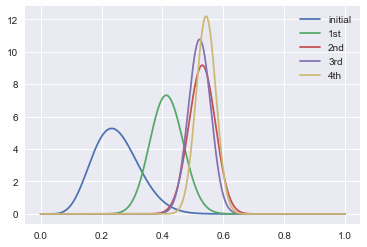

In [36]:
theta0 = 0.6
a0, b0 = 8, 24
print("step 0: mode = unknown")

xx = np.linspace(0, 1, 1000)
plt.plot(xx, sp.stats.beta(a0, b0).pdf(xx), label="initial");

np.random.seed(0)
x = sp.stats.bernoulli(theta0).rvs(50)
N0, N1 = np.bincount(x, minlength=2)
a1, b1 = a0 + N1, b0 + N0
plt.plot(xx, sp.stats.beta(a1, b1).pdf(xx), label="1st");
print("step 1: mode =", (a1 - 1)/(a1 + b1 - 2))

x = sp.stats.bernoulli(theta0).rvs(50)
N0, N1 = np.bincount(x, minlength=2)
a2, b2 = a1 + N1, b1 + N0
plt.plot(xx, sp.stats.beta(a2, b2).pdf(xx), label="2nd");
print("step 2: mode =", (a2 - 1)/(a2 + b2 - 2))

x = sp.stats.bernoulli(theta0).rvs(50)
N0, N1 = np.bincount(x, minlength=2)
a3, b3 = a2 + N1, b2 + N0
plt.plot(xx, sp.stats.beta(a3, b3).pdf(xx), label="3rd");
print("step 3: mode =", (a3 - 1)/(a3 + b3 - 2))

x = sp.stats.bernoulli(theta0).rvs(50)
N0, N1 = np.bincount(x, minlength=2)
a4, b4 = a3 + N1, b3 + N0
plt.plot(xx, sp.stats.beta(a4, b4).pdf(xx), label="4th");
print("step 4: mode =", (a4 - 1)/(a4 + b4 - 2))

plt.legend()
plt.show()

## 카테고리 분포의 모수 추정

다음으로 클래스 갯수가 $K$인 카테고리 분포의 모수 $\theta$ 벡터를 베이지안 추정법으로 추정해 본다.

카테고리 분포의 모수의 각 원소는 모두 0부터 1사이의 값을 가지므로 사전 분포는 하이퍼 모수 $\alpha_k=1$인 디리클리 분포로 한다.

$$ P(\theta) \propto \prod_{k=1}^K \theta_k^{\alpha_k - 1} \;\;\; (\alpha_k = 1, \; \text{ for all } k) $$


데이터는 모두 독립적인 카테고리 분포의 곱이므로 Likelihood는 다음과 같이 다항 분포가 된다.

$$ P(x_{1},\ldots,x_{N} \mid \theta) = \prod_{i=1}^N  \prod_{k=1}^K \theta_k^{x_{i,k}} $$

베이지안 규칙을 사용하여 사후 분포를 구하면 다음과 같이 갱신된 하이퍼 모수 $\alpha'_i$를 가지는 디리클리 분포가 된다.

$$ 
\begin{eqnarray}
P(\theta \mid x_{1},\ldots,x_{N})
&\propto & P(x_{1},\ldots,x_{N} \mid \theta)  P(\theta) \\
&=& \prod_{i=1}^N  \prod_{k=1}^K \theta_k^{x_{i,k}} \cdot \prod_{k=1}^K \theta_k^{\alpha_k - 1}  \\
&=& \prod_{k=1}^K  \theta^{\sum_{i=1}^N x_{i,k} + \alpha_k − 1}   \\
&=& \prod_{k=1}^K  \theta^{N_k + \alpha_k −1}   \\
&=& \prod_{k=1}^K  \theta^{\alpha'_k −1}   \\
\end{eqnarray}
$$

이 경우에도 conjugate prior 임을 알 수 있다.

갱신된 하이퍼 모수의 값은 다음과 같다.
$$ \alpha'_k = N_k + \alpha_k $$



In [37]:
def plot_dirichlet(alpha):

    def project(x):
        n1 = np.array([1, 0, 0])
        n2 = np.array([0, 1, 0])
        n3 = np.array([0, 0, 1])
        n12 = (n1 + n2)/2
        m1 = np.array([1, -1, 0])
        m2 = n3 - n12
        m1 = m1/np.linalg.norm(m1)
        m2 = m2/np.linalg.norm(m2)
        return np.dstack([(x-n12).dot(m1), (x-n12).dot(m2)])[0]

    def project_reverse(x):
        n1 = np.array([1, 0, 0])
        n2 = np.array([0, 1, 0])
        n3 = np.array([0, 0, 1])
        n12 = (n1 + n2)/2
        m1 = np.array([1, -1, 0])
        m2 = n3 - n12
        m1 = m1/np.linalg.norm(m1)
        m2 = m2/np.linalg.norm(m2)
        return x[:,0][:, np.newaxis] * m1 + x[:,1][:, np.newaxis] * m2 + n12

    eps = np.finfo(float).eps * 10
    X = project([[1-eps,0,0], [0,1-eps,0], [0,0,1-eps]])
    
    import matplotlib.tri as mtri

    triang = mtri.Triangulation(X[:,0], X[:,1], [[0, 1, 2]])
    refiner = mtri.UniformTriRefiner(triang)
    triang2 = refiner.refine_triangulation(subdiv=6)
    XYZ = project_reverse(np.dstack([triang2.x, triang2.y, 1-triang2.x-triang2.y])[0])

    pdf = sp.stats.dirichlet(alpha).pdf(XYZ.T)
    plt.tricontourf(triang2, pdf)
    plt.axis("equal")
    plt.show()

In [38]:
theta0 = np.array([0.2, 0.6, 0.2])

np.random.seed(0)
x1 = np.random.choice(3, 20, p=theta0)
N1 = np.bincount(x1, minlength=3)
x2 = np.random.choice(3, 100, p=theta0)
N2 = np.bincount(x2, minlength=3)
x3 = np.random.choice(3, 1000, p=theta0)
N3 = np.bincount(x3, minlength=3)

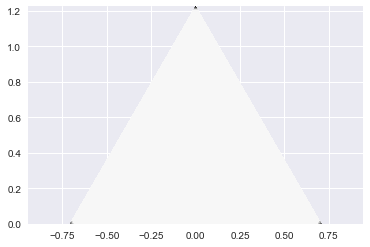

In [39]:
a0 = np.ones(3) / 3
plot_dirichlet(a0)

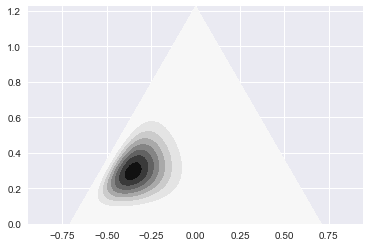

[ 0.12962963  0.62962963  0.24074074]


In [40]:
a1 = a0 + N1
plot_dirichlet(a1)
print((a1 - 1)/(a1.sum() - 3))

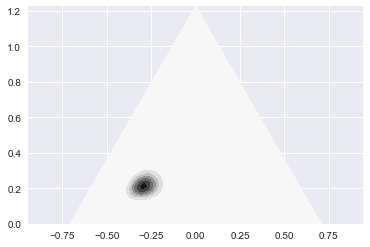

[ 0.20621469  0.62146893  0.17231638]


In [41]:
a2 = a1 + N2
plot_dirichlet(a2)
print((a2 - 1)/(a2.sum() - 3))

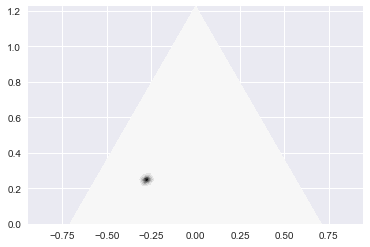

[ 0.2033393   0.59421586  0.20244484]


In [42]:
a3 = a2 + N3
plot_dirichlet(a3)
print((a3 - 1)/(a3.sum() - 3))

## 정규 분포의 기댓값 모수 추정

이번에는 정규 분포의 기댓값 모수를 베이지안 방법으로 추정한다. 분산 모수 $\sigma^2$은 알고 있다고 가정한다.

기댓값은 $-\infty$부터 $\infty$까지의 모든 수가 가능하기 때문에 모수의 사전 분포로는 정규 분포를 사용한다.

$$ P(\mu) = N(\mu_0, \sigma^2_0) = \dfrac{1}{\sqrt{2\pi\sigma_0^2}} \exp \left(-\dfrac{(\mu-\mu_0)^2}{2\sigma_0^2}\right)$$

데이터는 모두 독립적인 정규 분포의 곱이므로 Likelihood는 다음과 같이 된다.

$$ P(x_{1},\ldots,x_{N} \mid \mu) = \prod_{i=1}^N N(x_i \mid \mu )  = \prod_{i=1}^N  \dfrac{1}{\sqrt{2\pi\sigma^2}} \exp \left(-\dfrac{(x_i-\mu)^2}{2\sigma^2}\right)  $$

$$ 
\begin{eqnarray}
P(\theta \mid x_{1},\ldots,x_{N})  
&\propto & P(x_{1},\ldots,x_{N} \mid \theta) P(\theta) \\
&\propto & \exp \left(-\dfrac{(\mu-\mu'_0)^2}{2\sigma_0^{'2}}\right) \\
\end{eqnarray}
$$

베이지안 규칙을 사용하여 사후 분포를 구하면 다음과 같이 갱신된 하이퍼 모수  를 가지는 정규 분포가 된다.

$$
\begin{eqnarray}
\mu'_0 &=& \dfrac{\sigma^2}{N\sigma_0^2 + \sigma^2}\mu_0 + \dfrac{N\sigma_0^2}{N\sigma_0^2 + \sigma^2} \dfrac{\sum x_i}{N} \\
\dfrac{1}{\sigma_0^{'2}} &=& \dfrac{1}{\sigma_0^{2}} + \dfrac{N}{\sigma^{'2}}
\end{eqnarray}
$$


INITIAL DEGREE OF BELIEF(mu):  0
1.15009324852
1.61220499039
1.85003397857
1.80588407879


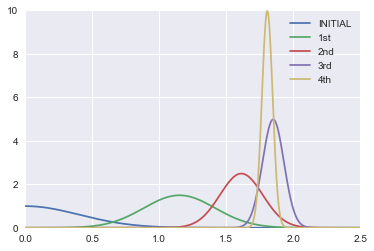

In [63]:
mu, sigma2 = 2, 4

mu0, sigma20 = 0, 0.4
xx = np.linspace(0, 3, 1000)
np.random.seed(0)


plt.plot(xx, sp.stats.norm(mu0, sigma20).pdf(xx), label="INITIAL");
print("INITIAL DEGREE OF BELIEF(mu): ", mu0)

N = 5
x = sp.stats.norm(mu).rvs(N)
mu0 = sigma2/(N*sigma20 + sigma2) * mu0 + (N*sigma20)/(N*sigma20 + sigma2)*x.mean()
sigma20 = 1/(1/sigma20 + N/sigma2)
plt.plot(xx, sp.stats.norm(mu0, sigma20).pdf(xx), label="1st");
print(mu0)

N = 10
x = sp.stats.norm(mu).rvs(N)
mu0 = sigma2/(N*sigma20 + sigma2) * mu0 + (N*sigma20)/(N*sigma20 + sigma2)*x.mean()
sigma20 = 1/(1/sigma20 + N/sigma2)
plt.plot(xx, sp.stats.norm(mu0, sigma20).pdf(xx), label="2nd");
print(mu0)

N = 25
x = sp.stats.norm(mu).rvs(N)
mu0 = sigma2/(N*sigma20 + sigma2) * mu0 + (N*sigma20)/(N*sigma20 + sigma2)*x.mean()
sigma20 = 1/(1/sigma20 + N/sigma2)
plt.plot(xx, sp.stats.norm(mu0, sigma20).pdf(xx), label="3rd");
print(mu0)

N = 50
x = sp.stats.norm(mu).rvs(N)
mu0 = sigma2/(N*sigma20 + sigma2) * mu0 + (N*sigma20)/(N*sigma20 + sigma2)*x.mean()
sigma20 = 1/(1/sigma20 + N/sigma2)
plt.plot(xx, sp.stats.norm(mu0, sigma20).pdf(xx), label="4th");
print(mu0)

plt.axis([1, 3, 0, 20])
plt.legend()
plt.xlim(0, 2.5)
plt.ylim(0,10)
plt.show()